# Ejemplo 0: Aprendizaje supevisado 

### 0. Cargar datos y crear dataframe

In [21]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data.DESCR) # Descripción del dataset es igual a data['DESCR']

In [23]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Crear un DataFrame de pandas con los datos del iris de entrada (data)
features = pd.DataFrame(data=data.data, columns=data.feature_names) # solo datos de entrada, los de salida son data.target
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
# Crear un DataFrame de pandas con los datos del iris de salida (target)
target = pd.DataFrame(data=data.target, columns=['species'])
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [26]:
# Unimos en un solo DataFrame
iris = pd.concat([features, target], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
# Cambiar los valores numéricos de la columna 'species' por los nombres de las especies
    # iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris['species'] = iris.species.map(lambda x: data.target_names[x])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1. Análisis de datos 


In [29]:
# Ver información básica del DataFrame
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
# Comprpbar si hay valores nulos en el DataFrame
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [31]:
# Estadísticas descriptivas del DataFrame
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
# Matriz de correlación entre las variables numéricas
iris.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [35]:
# Conteo de intancias por especie
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

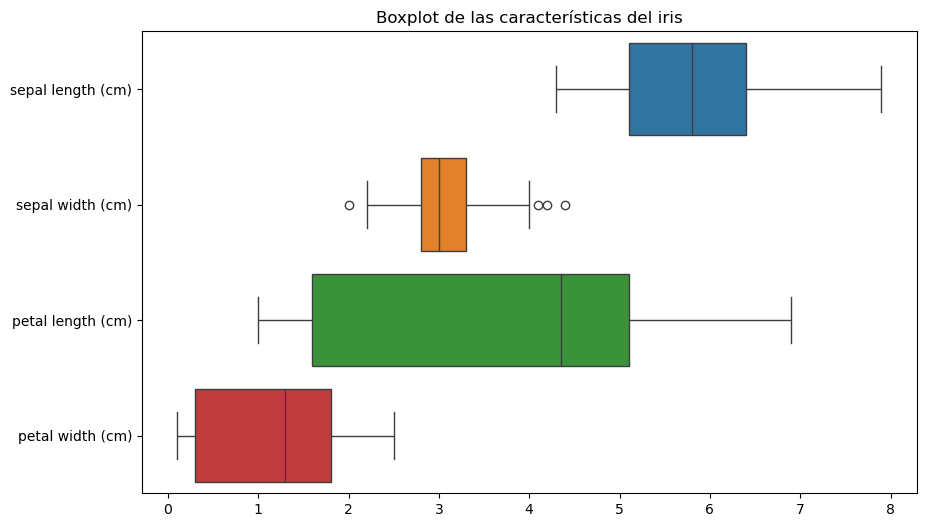

In [36]:
# Grafico de cajas de las características del iris
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, orient="h")
plt.title("Boxplot de las características del iris")
plt.show()

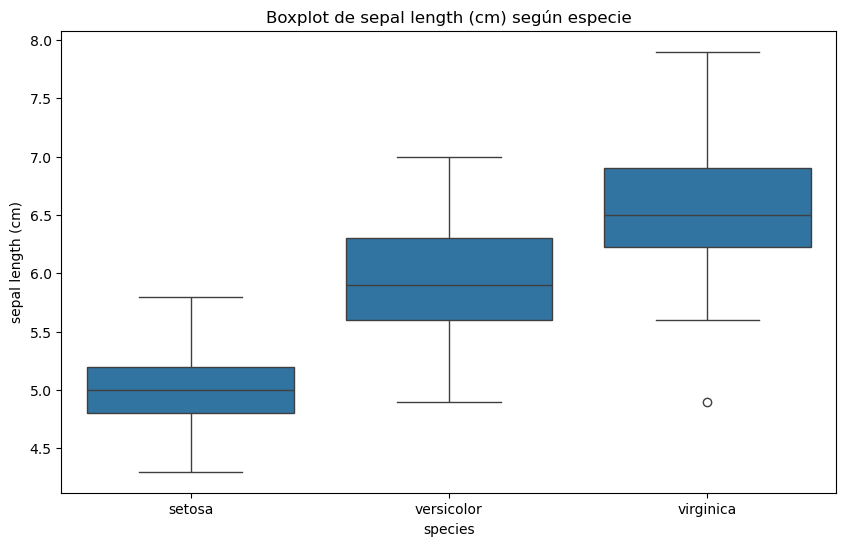

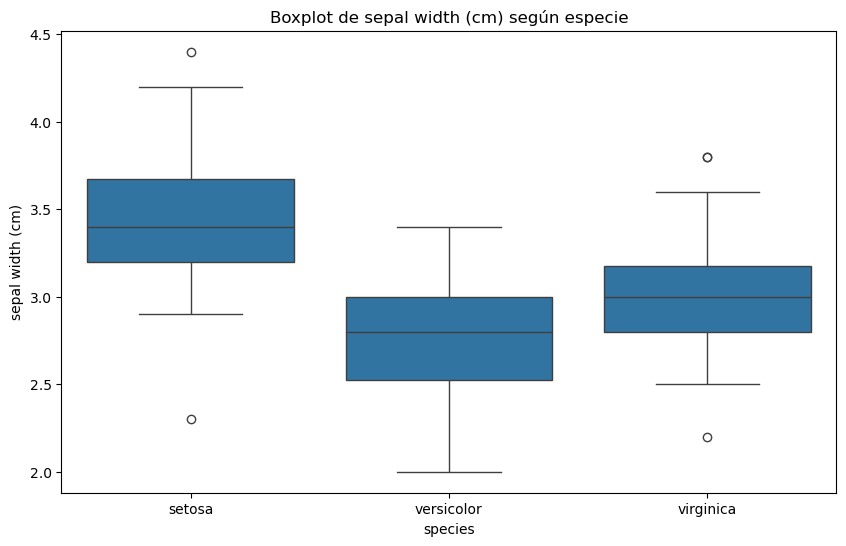

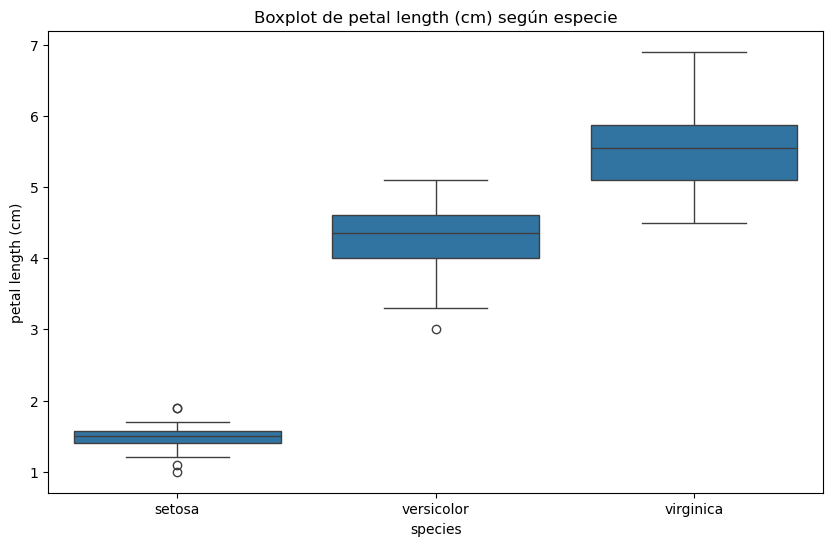

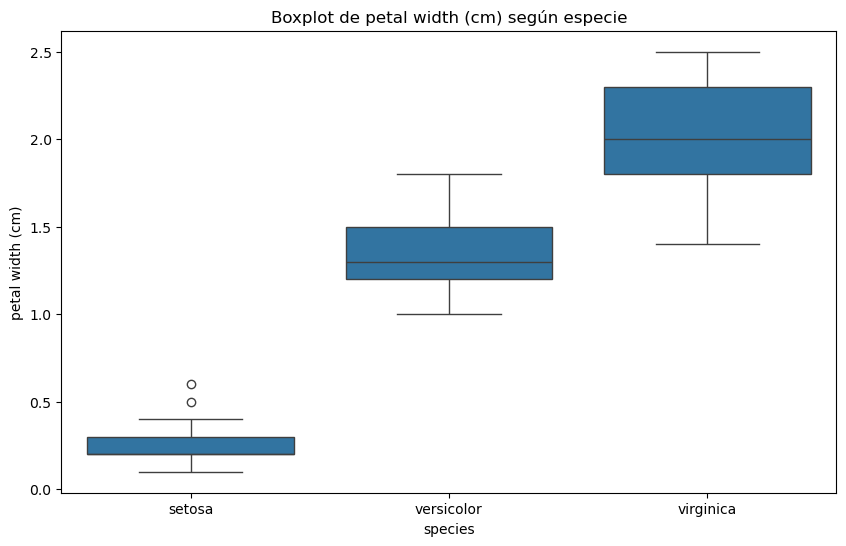

In [38]:
# Gráficos de cajas de cada carácterística pero según la especie un gráfico diferente
for column in iris.columns[:-1]:  # Excluir la columna de especie
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=iris, x="species", y=column)
    plt.title(f"Boxplot de {column} según especie")
    plt.show()

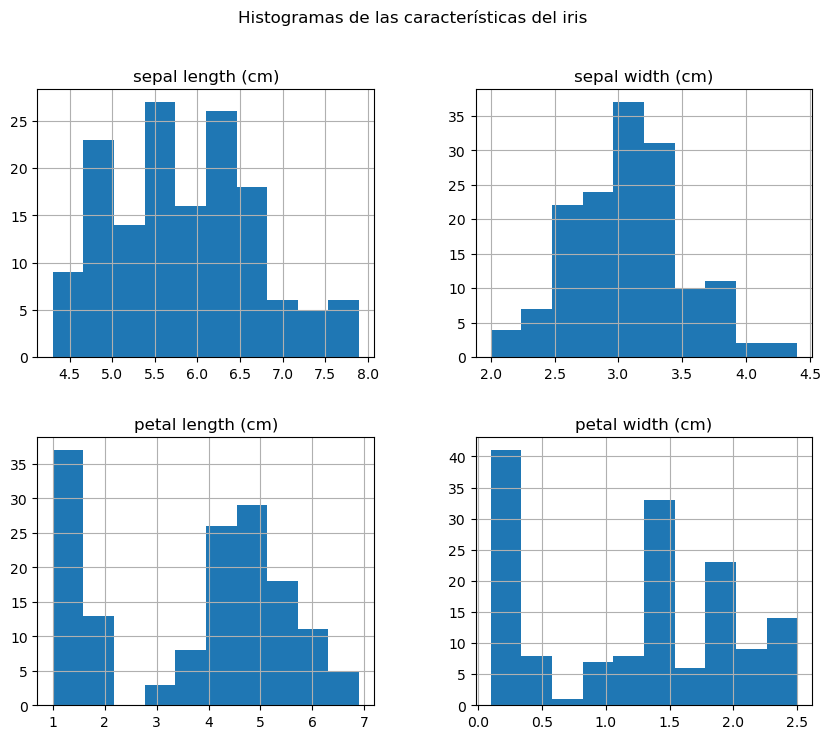

In [39]:
# Gráficar en forma de histogramas las características del iris
iris.hist(figsize=(10, 8))
plt.suptitle("Histogramas de las características del iris")
plt.show()

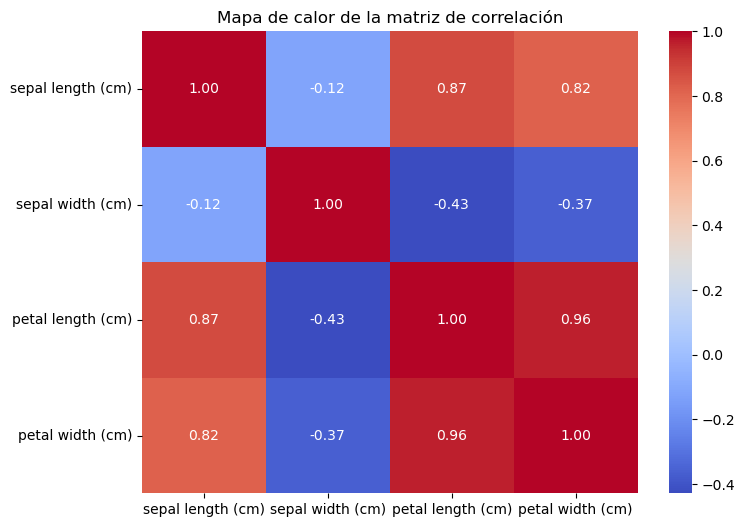

In [40]:
# Matriz de correlación entre las variables numéricas
corr = iris.corr(numeric_only=True)     
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

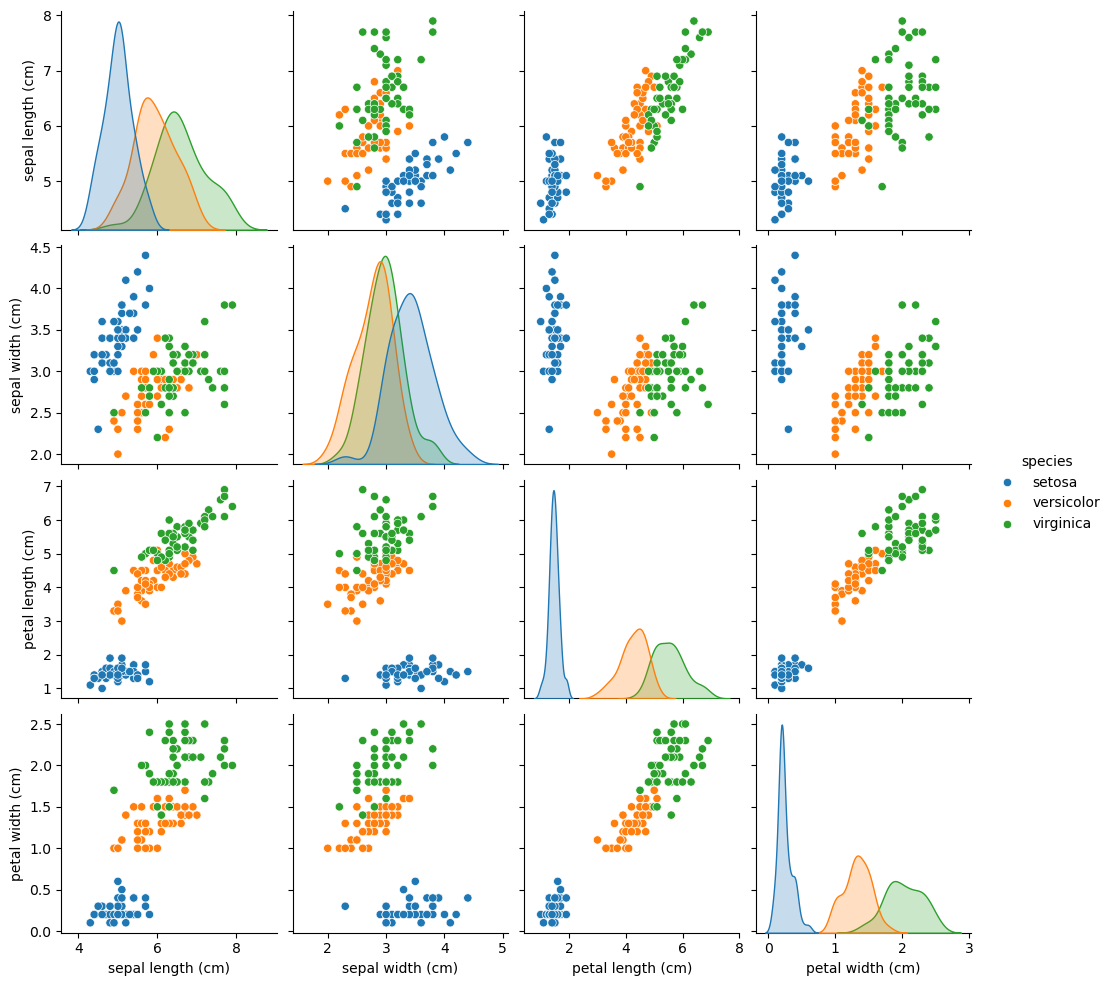

In [43]:
# Gráfico de pares (pairplot) para visualizar las relaciones entre las características del iris
sns.pairplot(iris, hue='species')
plt.show()

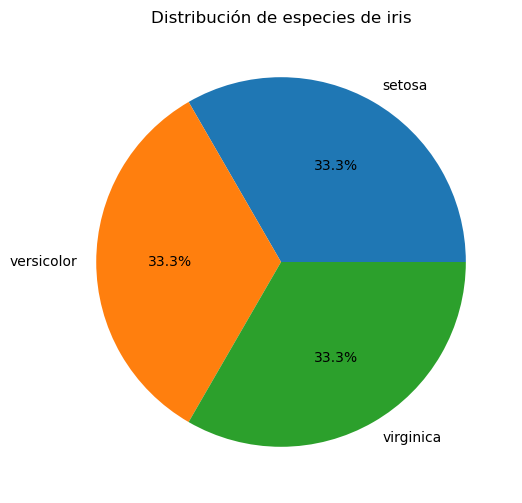

In [44]:
# Gráfico de piechart del conteo de instancias por especie
iris['species'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Distribución de especies de iris')
plt.ylabel('')  # Eliminar la etiqueta del eje y 
plt.show()

### 2. División del dataset (datos entrenamiento y test)

In [45]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
# División del dataset (datos entrenamiento y test)
from sklearn.model_selection import train_test_split
X = iris.drop("species", axis=1) # características de entrada sin modificar el dataframe original, sin especie
y = iris["species"] # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% test, semilla 42 para reproducibilidad


División del dataset (datos entrenamiento y test), donde la variable objetivo es la última columna
from sklearn.model_selection import train_test_split
X = iris.iloc[:, :-1] # características de entrada sin modificar el dataframe original, sin especie
y = iris.iloc[:, -1] # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% test, semilla 42 para reproducibilidad


### 3. Elegir algoritmo de clasificación 


- Vamos a predecir una categoría
- Datos etiquetados (Aprendizaje supervisado)
- menos de 100 mil ejemplos

--> Arbol de Decisión

In [57]:
# Algoritmo de arbol de decisión
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

### 4. Entrenamiento

In [58]:
 # Entrenamiento del modelo
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

### 5. Evaluación del modelo (métricas de resultado)

In [59]:
# Evaluación del modelo
model.score(X_test, y_test)

1.0

# Ejemplo 2: Usando Cross Validation

Para comprobar si el algoritmo está bien entrenado, cogerá el 20% distintos varias veces para testear y hará la media. Cambiando también el 80% de los datos de entrenamiento. 

In [73]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold # Importar KFold para validación cruzada
kf = KFold(n_splits=10, random_state=42, shuffle=True) # Crear objeto KFold en 10 partes
model = DecisionTreeClassifier(random_state=42) # Crear el modelo de árbol de decisión
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% test, semilla 42 para reproducibilidad
scores = cross_val_score(model, X, y, cv=kf)
np.mean(scores)

np.float64(0.9400000000000001)

In [72]:
# recorrer cada uno de los scores y mostrarlos
for i, score in enumerate(scores):
    print(f"Score del pliegue {i+1}: {score:.4f}")

Score del pliegue 1: 1.0000
Score del pliegue 2: 1.0000
Score del pliegue 3: 1.0000
Score del pliegue 4: 0.9333
Score del pliegue 5: 0.9333
Score del pliegue 6: 0.8667
Score del pliegue 7: 0.8667
Score del pliegue 8: 1.0000
Score del pliegue 9: 0.8667
Score del pliegue 10: 0.9333


# Ejemplo 3: Usando Cross Validation con Estratificación

In [76]:
# Validación Kfold estratificada
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
model = DecisionTreeClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% test, semilla 42 para reproducibilidad
scores = cross_val_score(model, X, y, cv=kf)
np.mean(scores)

np.float64(0.9400000000000001)

In [77]:
# recorrer cada uno de los scores y mostrarlos
for i, score in enumerate(scores):
    print(f"Score del pliegue {i+1}: {score:.4f}")

Score del pliegue 1: 1.0000
Score del pliegue 2: 1.0000
Score del pliegue 3: 1.0000
Score del pliegue 4: 0.9333
Score del pliegue 5: 0.9333
Score del pliegue 6: 0.8667
Score del pliegue 7: 0.8667
Score del pliegue 8: 1.0000
Score del pliegue 9: 0.8667
Score del pliegue 10: 0.9333


# Ejemplo nuevo: ML supervisado usando Hiperparámetros

Con scikit-plot con un sólo gráfico ves como varían los datos (tampoco es tan importante, sería cuando tenemos pocos datos)

In [ ]:
%pip install scikit-plot

In [27]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Cargar el dataset de iris
data = load_iris()
data.keys()

# Crear un DataFrame de pandas con los datos del iris de entrada (data) y con los datos de salida (target)
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['species'])    
iris = pd.concat([features, target], axis=1)

# Entrenar y evaluar el modelo con validación cruzada KFold
X = iris.drop("species", axis=1) # características de entrada sin modificar el dataframe original, sin especie
y = iris["species"] # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% entrenamiento, 20% test, semilla 42 para reproducibilidad

# Algoritmo de arbol de decisión
model = DecisionTreeClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Validación Kfold estratificada
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(model, X, y, cv=kf)
np.mean(scores)


np.float64(0.9333333333333333)

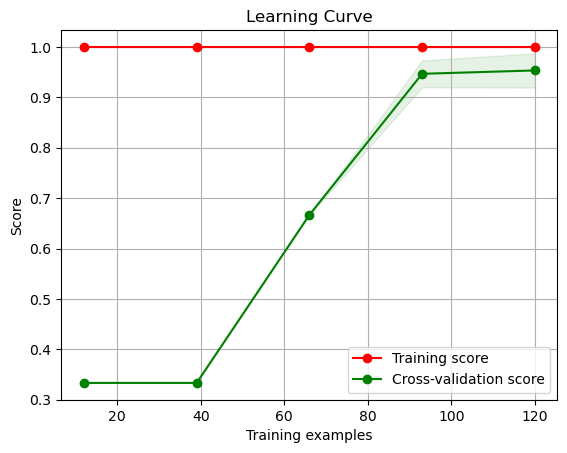

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.estimators.plot_learning_curve(model, X, y) # Graficar la curva de aprendizaje
plt.show()

## Hiperparámetros
Puedes poner distintos hiperparámetros (Grid) y probar para ver cual es la mejor combinación que entrena. Para entrenar nuestro modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30], # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Mínimo número de muestras para dividir un nodo
    'criterion': ['gini', 'entropy'], # Función de criterio para medir la calidad de una división
    'random_state': [42, 1234, 4321] # Semilla para reproducibilidad
}

# Crear el modelo de búsqueda en cuadrícula con validación cruzada KFold
model2 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=KFold(n_splits=5), n_jobs=-1, scoring='accuracy')
model2.fit(X_train, y_train)

print("Mejores parámetros encontrados:") # Mostrar los mejores hiperparámetros encontrados
model2.best_params_


Mejores parámetros encontrados:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'random_state': 1234}

In [47]:
# mejor puntuación 
model2.best_score_

np.float64(0.9416666666666668)

* La matriz de confusión te saca cuantas ha acertado correctamente (en la predicción), en la diagonal son las correctas.

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model2.predict(X_test)
print("Matriz de confusión:")   
print(confusion_matrix(y_test, pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, pred))
print("Exactitud:", accuracy_score(y_test, pred))

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Exactitud: 1.0
